#  Notebook 5: Introduction to  Logistic Regression, Pandas, and TensorFlow #



## Learning Goals##
This notebook will serve as an introduction to the logistic regression as well as the new extremely powerful TensorFlow library for Machine Learning (ML) from Google. We will also learn how to use the versatile Pandas package for handling data. For those of you familiar with the `R` language, the Pandas objects are extremely similar to the dataframe objects in `R`.

## Overview##
Throughout, we will work with the [SUSY dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz). It is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html), which is a very comprehensive repository of useful datasets relevant to ML.

Here is the description of the SUSY dataset we will be playing around with for this notebook:
>The data has been produced using Monte Carlo simulations and contains events with two leptons (electrons or muons). In high energy physics experiments, such as the ATLAS and CMS detectors at the CERN LHC, one major hope is the discovery of new particles. To accomplish this task, physicists attempt to sift through data events and classify them as either a signal of some new physics process or particle, or instead a background event from understood Standard Model processes. Unfortunately we will never know for sure what underlying physical process happened (the only information to which we have access are the final state particles). However, we can attempt to define parts of phase space that will have a high percentage of signal events. Typically this is done by using a series of simple requirements on the kinematic quantities of the final state particles, for example having one or more leptons with large amounts of momentum that is transverse to the beam line ($p_{T}$). Here instead we will use logistic regression in order to attempt to find out the relative probability that an event is from a signal or a background event and rather than using the kinematic quantities of final state particles directly we will use the output of our logistic regression to define a part of phase space that is enriched in signal events. The dataset we are using has the value of 18 kinematic variables ("features") of the event. The first 8 features are direct measurements of final state particles, in this case the $p_{T}$, pseudo-rapidity ($\eta$), and azimuthal angle ($\phi$) of two leptons in the event and the amount of missing transverse momentum (MET) together with its azimuthal angle. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes. You can think of them as physicists attempt to use non-linear functions to classify signal and background events and they have been developed with a lot of deep thinking on the part of physicist. There is however, an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks and the dropout algorithm are presented in the original paper to compare the ability of deep-learning to bypass the need of using such high level features. We will also explore this topic in later notebooks. The dataset consists of 5 million events, the first 4,500,000 of which we will use for training the model and the last 500,000 examples will be used as a test set.

This dataset comes from this interesting paper by the UCI group: <cite> P. Baldi, P. Sadowski, and D. Whiteson. "Searching for Exotic Particles in High-energy Physics with Deep Learning." Nature Communications 5 (July 2, 2014)</cite>.

## Categorical data/Classification Tasks ##

So far, we have largely focused on supervised learning tasks such as linear regression, where the goal is to make predictions about continuous labels. Often, we are also interested in classification tasks -- where the goal is to assign samples to categories. The training data consists of a set of features and discrete labels. This type of data is called categorical data (the data comes in different categories). 

Initially, we will focus on a binary classification task. In the SUSY dataset, the goal is to decide whether a data point represents signal "potential collision"- labeled 1, or "background"(Standard Model processes which produce final states with similar constituents as SUSY processes) - labeled 0. This is done by looking at 18 features - the first 8 of which are "low-level" features that can be directly measured and the last 10 features are "higher-order" features constructed using physics intuition. In more detail:
>The first column is the class label (1 for signal, 0 for background), followed by the 18 features (8 low-level features then 10 high-level features):: lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1)

Our goal will be to use either the first 8 features or the full 18 features to predict whether an event is signal or background.

## Logistic Regression##


One of the best understood and canonical methods for performing such a task is Logistic Regression. We will see that a deep understanding of Logistic regression will introduce us to many of the ideas and techniques at the forefront of modern Machine Learning. In Logistic regression, each set of features $\mathbf{x}_i$ is associated with a category $C_i\in\{1,0\}$, with $i=1\ldots n$. It is helpful to re-define $\mathbf{x}$ to be an extended vector $\mathbf{x}\rightarrow (1,\mathbf{x})$ (which just accounts for an intercept, see Sec. VI of the review). Then, the Likelihood function for Logistic regression is given by the sigmoid function

$$
P(c_i=1)=1-P(c_i=0)= {1 \over 1+ e^{-\mathbf{w}\cdot \mathbf{x}_i}},
$$

where $\mathbf{w}$ are the weights that define the logistic regression. Notice that this is just the Fermi function with $\beta E=-\mathbf{w}\cdot \mathbf{x}$.


As in Sec. VI of the review, we will maximize the Log-likelihood of the observed data. Let us define the function
$$
f(a)={1 \over 1+ e^{-a}},
$$
Notice that the derivative with respect to $a$ is given by
$$
{df \over da}= f(1-f).
$$

Define $f_i \equiv f(\mathbf{w}\cdot \mathbf{x}_i)$. Then, the Likelihood of the data $\{ \mathbf{x}_i, C_i \}$ is given by
$$
P(Data|\mathbf{x})= \prod_{i=1}^n f_i^{C_i}(1-f_i)^{1-C_i}
$$
and the log-likelihood is given by
$$
\log{P(Data|\mathbf{w})}= \sum_{i=1}^n C_i \log f_i + (1-C_i)\log(1-f_i)
$$

The negative of the log-likelihood gives us the cross-entropy error function
$$
\mathrm{Cross\,Entropy}=E(\mathbf{w})= -\sum_{i=1}^n C_i \log f_i + (1-C_i)\log(1-f_i).
$$

Using the formula above notice that
$$
\nabla E(\mathbf{w})=\sum_{i=1}^n (f_i-C_i)\mathbf{x}_i.
$$
In other words, the gradient points in the sum of training example directions weighted by the difference between the true label and the probability of predicting that label.



## Finding the MLE Estimate ##

Notice the Maximum-Likelihood Estimation (MLE) is the same as minimizing the cross-entropy. There is no closed form expression for this. One strategy is to start with an arbitrary $\mathbf{w}$ and then update our estimate based on our error function. In particular, we would like to nudge $\mathbf{w}$ in the direction where the error is decreasing the fastest. This is the idea behind gradient descent. Furthermore, we can show that the cross-entropy error function used in logistic regression has a unique minimum. Thus, we can perform this procedure with relative ease (However, as a word of caution, note there is a generic instability in the MLE procedure for linearly separable data).

Theoretically, one nice method for doing this is the <i> Newton-Raphson </i> method. In this method, we iteratively calculate the gradient 
$$
\mathbf{w}^{new} \leftarrow \mathbf{w}^{old} - \mathbf{H}^{-1} \nabla E(\mathbf{w}),
$$
where $\mathbf{H}$ is the Hessian matrix which is the second derivative of the energy function. For OLS linear regression, one can show that this procedure yields the right answer.

<b> Exercise: </b> Show that for OLS Linear regression the formula above produces right answer.

A: $$E(w^{new})=E(w^{old})+\nabla E^T\delta w+1/2\cdot\delta w^T\cdot H \cdot\delta w$$
Note that this is exact when E is quadratic. Now differentiate both sides with respect to $\delta w$ : 
we get: $$0=0+\nabla E+H\cdot\delta w$$
$$\delta w=−H^{−1}\cdot \nabla E$$

More generally, there are a number of generalizations of this idea that have been proposed. We will refer to these kinds of methods as generalized gradient descent methods and discuss them extensively in what follows.


## Importing the SUSY data set with Pandas

<b> Exercise:</b> In what follows, use Pandas to import the first 4,500,000 examples and call that the training data and import the last 500,000 examples and call that the test data.

In [1]:
# Importing the SUSY Data set
import sys, os
import pandas as pd

import numpy as np
import warnings
#Commnet the next line on to turn off warnings
#warnings.filterwarnings('ignore')


seed=12
np.random.seed(seed)
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# suppress tflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.set_random_seed(seed)

# Download the SUSY.csv (about 2GB) from UCI ML archive and save it in the same directory as this jupyter notebook
# See: https://archive.ics.uci.edu/ml/machine-learning-databases/00279/
#filename="SUSY.csv"
# filename=os.path.expanduser('~')+'/ML_review/SUSY_data/SUSY.csv' 
filename=os.path.expanduser('~')+'/Documents/SUSY.csv' 

columns=["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]

# Load 1,500,000 rows as train data, 50,000 as test data
df_train=pd.read_csv(filename,names=columns,nrows=1500000,engine='python')
df_test=pd.read_csv(filename,names=columns,nrows=50000, skiprows=1500000,engine='python')

Instructions for updating:
non-resource variables are not supported in the long term


## Run logistic regression using Linear Model functions in TensorFlow##

We now will run logistic regression using MLE. 

<b>Exercise:</b> Using the tensor flow tutorial [here](https://www.tensorflow.org/versions/r0.9/tutorials/wide/index.html#setup), we will run logistic regression on the SUSY data for both the simple features (first 8 features) and the full feature space. First we will start with only the low-level features. We will also investigate the use of Ridge Regression by testing the results as as function of the regularization parameter $\alpha$. 

Let us define some functions to do the actual training for us and will let them take the number of features as an input parameter.


In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
#import ml_style as style #optional styling sheet
#mpl.rcParams.update(style.style) #optional styling sheet

def getTrainData(nVar):
    designMatrix = df_train.iloc[:,1:nVar+1].values
    #now the signal
    labels = df_train['signal'].values # labels (0 or 1)
    return (designMatrix,labels)

def getTestData(nVar):
    designMatrix = df_test.iloc[:,1:nVar+1].values
    #now the signal
    labels = df_test['signal'].values
    return (designMatrix,labels)

# define
def build_roc_curve(probs, signal_bit, threshes):
    # Convert things to a pandas series to build a DataFrame
    # which will make ROC curve logic easier to express
    signal_probs = pd.Series(probs[:,1])
    signal_true = pd.Series(signal_bit)
    signal_df = pd.DataFrame(signal_probs, columns=['sig_prob'])
    signal_df.loc[:,'sig_true'] = signal_true
    Acceptance = []
    Rejection = []
    for thresh in threshes:
        # define acceptance
        signal_df.loc[:,'accept'] = signal_df['sig_prob'] > thresh
        # sum over data frame with slicing conditions
        nSigCor = len(signal_df[(signal_df['accept']) & (signal_df['sig_true']==1.)])
        nSig = len(signal_df[signal_df['sig_true']==1.])
        nBkgCor = len(signal_df[ (signal_df['sig_true']==0.) & (~signal_df['accept'])])
        nBkg = len(signal_df[signal_df['sig_true']==0.])
        Acceptance.append(nSigCor/nSig) # False positive rate
        Rejection.append(nBkgCor/nBkg) # True positive rate

    return Acceptance, Rejection
    
# let's define this as a function so we can call it easily
def runTensorFlowRegression(nVar,alpha):

    #make data array placeholder for just first 8 simple features
    x = tf.placeholder(tf.float32,[None,nVar])
    #make weights and bias
    W = tf.Variable(tf.zeros([nVar,2])) #we will make y 'onehot' 0 bit is bkg, 1 bit is signal
    b = tf.Variable(tf.zeros([2]))

    #make 'answer variable'
    y = tf.nn.softmax(tf.matmul(x, W) + b)
    #placeholder for correct answer
    y_ = tf.placeholder(tf.float32, [None, 2])
    #cross entropy with L2 regularizer
    cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y,labels=y_)+alpha*tf.nn.l2_loss(W))
    
    #define training step
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    #initialize variables 
    init = tf.global_variables_initializer()
    #setup session
    sess = tf.Session()
    sess.run(init)

    #ok now everything is setup for tensorflow, but we need the data in a useful form
    #first let's get the variables
    Var_train, Sig_train_bit1 = getTrainData(nVar)
    #now the signal
    Sig_train_bit0 = Sig_train_bit1.copy()
    Sig_train_bit0 = 1 - Sig_train_bit0
    Sig_train = np.column_stack((Sig_train_bit0,Sig_train_bit1))
    
    ######## ------- TRAINING ----------############
    #Now perform minibatch gradient descent with minibatches of size 100:
    n_data = len(Sig_train_bit1)
    minibatch_size = 1000
    n_minibatch = n_data//minibatch_size
    print('\t Training with %i minibatches, dataset size is %i'%(n_minibatch,n_data))
    for i in range(0, n_minibatch):
        sys.stdout.write("%.3f %% completed \r"%(100*i/n_minibatch))
        sys.stdout.flush()
        start = i*minibatch_size
        end = (i+1)*minibatch_size-1
        
        batch_x = Var_train[start:end]
        batch_y = Sig_train[start:end]
        sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})
    
    
    # Accuracy function:
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    ######## ------- TESTING ----------############
    # Setup test data
    Var_test = df_test.iloc[:,1:nVar+1].values
    
    # Now the signal
    Sig_test_bit1 = df_test['signal'].values
    
    Sig_test_bit0 = Sig_test_bit1.copy()
    Sig_test_bit0 = 1 - Sig_test_bit0
    Sig_test = np.column_stack((Sig_test_bit0,Sig_test_bit1))
    print("\t Accuracy for alpha %.1E : %.3f" %(alpha,sess.run(accuracy, feed_dict={x: Var_test, y_: Sig_test})))
    
    # Get the weights
    weights = W.eval(session=sess)
    # Get probabilities assigned (i.e. evaluate y on test data)
    probs = y.eval(feed_dict = {x: Var_test}, session = sess)
    # now let's get the signal efficiency and background rejection on the test data
    print('\t Computing ROC curve ...')
    # build ROC curve by scanning over thresholds of probability of being
    # a background event and calculating signal efficiency/background rejection
    # at each threshold
    threshes = np.arange(0,1,0.01)
    Acceptance, Rejection = build_roc_curve(probs, Sig_test_bit1, threshes)

    return (probs,Acceptance,Rejection)

# Training and evaluating model
Now let's run using the first 8 variables only (the low-level features). Note: this will take several minutes !

Training for alpha = 1.00E-10
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-10 : 0.769
	 Computing ROC curve ...
Training for alpha = 7.94E-10
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 7.9E-10 : 0.769
	 Computing ROC curve ...
Training for alpha = 6.31E-09
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 6.3E-09 : 0.769
	 Computing ROC curve ...
Training for alpha = 5.01E-08
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 5.0E-08 : 0.769
	 Computing ROC curve ...
Training for alpha = 3.98E-07
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 4.0E-07 : 0.769
	 Computing ROC curve ...
Training for alpha = 3.16E-06
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 3.2E-06 : 0.769
	 Computing ROC curve ...
Training for alpha = 2.51E-05
	 Training with 1500 minibatches, dataset size is 1500000
	 Accu

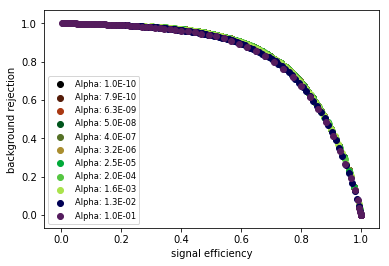

In [4]:
# We sweep the L2 regularizer strength (alpha) over 10 decades

alphas = np.logspace(-10,-1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    print("Training for alpha = %.2E"%alpha)
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probsSimple,accep,rej = runTensorFlowRegression(8,alpha)
    ax.scatter(accep,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1
    
ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

An accuracy of 77% is pretty good! More important to physics analysis is the ROC curve above which allows physicists to define a part of phase space that has more or less signal acceptance, but also less or more background rejection. It is up to the individual analysts in particular searches to decide on the best working point for them.

As you can see, using just the kinematic variables of the final state objects there is no need for regularization and in fact as we turn off the relative weights of the variables we lose discrimination power.

<b> Question:</b> Why do you think this is the case?

A: Regularization is useful only when there are noisy signals which should be discarded. However the first 8 features are all essential signals so no regularization is needed.

	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-05 : 0.769
	 Computing ROC curve ...


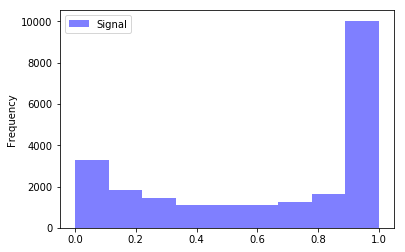

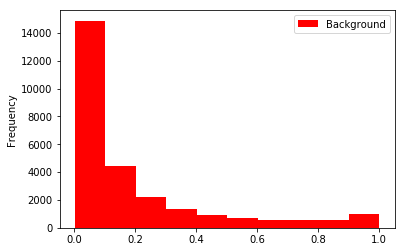

In [5]:
# now let's investigate how mixed the events are
probsSimple,accep,rej = runTensorFlowRegression(8,.00001) # train the model for 8 variables and alpha=.00001
Signal = df_test['signal'].values

df_test_acc = pd.DataFrame({'PROB':probsSimple[:,1]})
df_test_acc['SIG']=Signal
df_test_acc_sig = df_test_acc.query('SIG==1')
df_test_acc_bkg = df_test_acc.query('SIG==0')
df_test_acc_sig.plot(kind='hist',y='PROB',color='blue',alpha=0.5,bins=np.linspace(0,1,10),label='Signal')
df_test_acc_bkg.plot(kind='hist',y='PROB',color='red',label='Background')

You can see that the classification is pretty certain about its prediction (the majority of events are at the extremes of the probability), but also that a fair amount of signal events look lot like background events. This is often just a fact of life in HEP analysis.

### Now let's try to train the same model using the full set of 18 features:

	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-10 : 0.785
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.3E-09 : 0.785
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.6E-08 : 0.785
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 2.0E-07 : 0.785
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 2.5E-06 : 0.785
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 3.2E-05 : 0.785
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 4.0E-04 : 0.784
	 Computing ROC curve ...
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 5.0E-03 : 0.767
	 Computing ROC curve ...
	 Training with 1500 minibatches

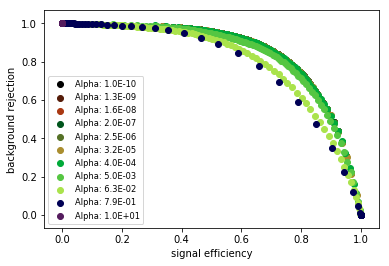

In [6]:
alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probsSimple,accep,rej = runTensorFlowRegression(18,alpha)
    ax.scatter(accep,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1
    
ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

Interestingly the accuracy barely improved! This suggests (as noted in the paper cited above) that machine learning is already doing a good job of capturing the information present in the complex variables using only the low-level variables as input. 

One thing that does change is that varying $\alpha$ now has some visible differences in the performance. It looks like increasing $\alpha$ simply degrades performance so the result is telling us we are most likely not undersampled.

In [14]:
# rescale the data to its Z-score

def data_rescale(datas):
    scaled_datas = (datas - datas.mean(axis=0))/(np.var(datas)**0.5)
    return scaled_datas

### Let's now try the same with scikit packages. First we will define our function to run the regression:

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

def runSciKitRegressionL2(nVar, alpha, rescale=False):
    X_train, y_train = getTrainData(nVar)
    X_test, y_test = getTestData(nVar)
    if rescale:
        X_train_rescaled = data_rescale(X_train)
        X_test_rescaled = data_rescale(X_test)
    clf = SGDClassifier(loss="log", penalty="l2",alpha=alpha,max_iter=5,tol=None)
    clf.fit(X_train,y_train.ravel())
    predictions = clf.predict(X_test)
    print('Accuracy on test data with alpha %.2E : %.3f' %(alpha,clf.score(X_test,y_test)) )
    probs = clf.predict_proba(X_test)

    #get signal acceptance and background rejection
    thresholds = np.arange(0,1,.01)
    Acceptance, Rejection = build_roc_curve(probs, y_test, thresholds)
    return (probs, Acceptance, Rejection)


def runSciKitRegressionL1(nVar,alpha,rescale=False):
    X_train, y_train = getTrainData(nVar)
    X_test, y_test = getTestData(nVar)
    if rescale:
        X_train_rescaled = data_rescale(X_train)
        X_test_rescaled = data_rescale(X_test)
    clf = SGDClassifier(loss="log", penalty="l1",alpha=alpha,max_iter=5,tol=None)
    clf.fit(X_train,y_train.ravel())
    predictions = clf.predict(X_test)
    print('Accuracy on test data with alpha %.2E : %.3f' %(alpha,clf.score(X_test,y_test)) )
    probs = clf.predict_proba(X_test)

    #get signal acceptance and background rejection
    thresholds = np.arange(0,1,.01)
    Acceptance, Rejection = build_roc_curve(probs, y_test, thresholds)
    return (probs,Acceptance,Rejection)

Accuracy on test data with alpha 1.00E-10 : 0.711


C:\Users\liuzh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Accuracy on test data with alpha 1.26E-09 : 0.657
Accuracy on test data with alpha 1.58E-08 : 0.652
Accuracy on test data with alpha 2.00E-07 : 0.667
Accuracy on test data with alpha 2.51E-06 : 0.758
Accuracy on test data with alpha 3.16E-05 : 0.770
Accuracy on test data with alpha 3.98E-04 : 0.769
Accuracy on test data with alpha 5.01E-03 : 0.767
Accuracy on test data with alpha 6.31E-02 : 0.749
Accuracy on test data with alpha 7.94E-01 : 0.543
Accuracy on test data with alpha 1.00E+01 : 0.457


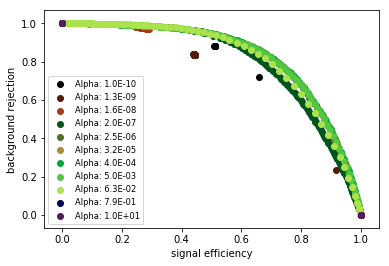

In [21]:
alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
rescale=False #enabling the rescale of the data

for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,accept,rej = runSciKitRegressionL1(8,alpha,rescale)
    ax.scatter(accept,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

This regression shows significantly more dependence on $\alpha$, in particular the total sample accuracy depends on $\alpha$, which is also manifested as being able to see clearly the differences in the ROC curves. It also has a slightly lower overall accuracy.

The group of points in the middle is indicative of the regression not being able to differentiate well between signal and background events while also having its classification categories well separated. What we mean is that the likelihood that the algorithm comes up with is very 'certain' about its classification, but not accurate. It is understandable that this would happen at large values of $\alpha$ in L1 regularization because it is turning off most of the input variables and so the classification is basically drawing a line in the distribution of just a few (or even one) input features and saying signal events are on this side while background events are on that side.

Let's check and see:

Accuracy on test data with alpha 5.00E-01 : 0.543


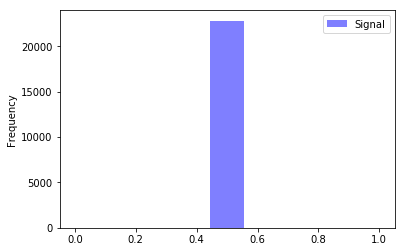

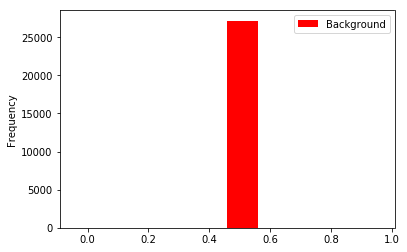

In [20]:
# now let's investigate how mixed the events are
probsSimple,accep,rej = runSciKitRegressionL1(8,.5,rescale)
Signal = df_test.iloc[:,0:1]

df_test_acc = pd.DataFrame({'PROB':probsSimple[:,1]})
df_test_acc['SIG']=Signal
df_test_acc_sig = df_test_acc.query('SIG==1')
df_test_acc_bkg = df_test_acc.query('SIG==0')
df_test_acc_sig.plot(kind='hist',y='PROB',color='blue',alpha=0.5,bins=np.linspace(0,1,10),label='Signal')
df_test_acc_bkg.plot(kind='hist',y='PROB',color='red',label='Background')

Exactly as we thought, the events have been distributed into two bins. What is interesting is that we have disfigured the model to such an extreme point that the background test data looks more like signal than the signal test data (recall that the reference point is the signal <i> train</i> data).

Now let's check running LASSO regression with the full set of features:

Accuracy on test data with alpha 1.00E-10 : 0.767


C:\Users\liuzh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Accuracy on test data with alpha 1.26E-09 : 0.639
Accuracy on test data with alpha 1.58E-08 : 0.732
Accuracy on test data with alpha 2.00E-07 : 0.755
Accuracy on test data with alpha 2.51E-06 : 0.780
Accuracy on test data with alpha 3.16E-05 : 0.786
Accuracy on test data with alpha 3.98E-04 : 0.787
Accuracy on test data with alpha 5.01E-03 : 0.783
Accuracy on test data with alpha 6.31E-02 : 0.749
Accuracy on test data with alpha 7.94E-01 : 0.543
Accuracy on test data with alpha 1.00E+01 : 0.543


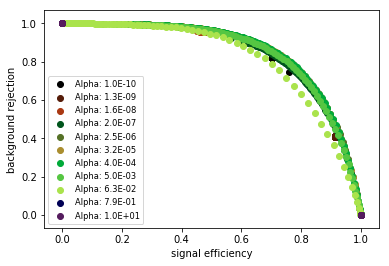

In [19]:
alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
rescale=True # enabling rescale of data
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,accept,rej = runSciKitRegressionL1(18,alpha,rescale)
    ax.scatter(accept,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

With the full set of variables there is more reasonable behavior versus our regularization parameter. To try to understand this, we can think of the underlying data. In our case, every input variable is important and when using just the eight low level variables we are removing too much valuable information when our regularization parameter is strong. When moving to the full set of variables, we recover some of the underlying information that we were killing off because of the fact that they are simply functions of those underlying variables.

Let's test L2 now with the first 8 variables:

Accuracy on test data with alpha 1.00E-10 : 0.715


C:\Users\liuzh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Accuracy on test data with alpha 1.26E-09 : 0.594
Accuracy on test data with alpha 1.58E-08 : 0.667
Accuracy on test data with alpha 2.00E-07 : 0.663
Accuracy on test data with alpha 2.51E-06 : 0.767
Accuracy on test data with alpha 3.16E-05 : 0.766
Accuracy on test data with alpha 3.98E-04 : 0.769
Accuracy on test data with alpha 5.01E-03 : 0.767
Accuracy on test data with alpha 6.31E-02 : 0.755
Accuracy on test data with alpha 7.94E-01 : 0.694
Accuracy on test data with alpha 1.00E+01 : 0.543


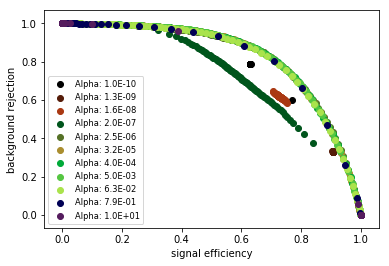

In [11]:
alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,accept,rej = runSciKitRegressionL2(8,alpha)
    ax.scatter(accept,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

Now let's try the full set of variables with L2 regularization:

Accuracy on test data with alpha 1.00E-10 : 0.776


C:\Users\liuzh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Accuracy on test data with alpha 1.26E-09 : 0.615
Accuracy on test data with alpha 1.58E-08 : 0.722
Accuracy on test data with alpha 2.00E-07 : 0.679
Accuracy on test data with alpha 2.51E-06 : 0.781
Accuracy on test data with alpha 3.16E-05 : 0.787
Accuracy on test data with alpha 3.98E-04 : 0.789
Accuracy on test data with alpha 5.01E-03 : 0.785
Accuracy on test data with alpha 6.31E-02 : 0.760
Accuracy on test data with alpha 7.94E-01 : 0.719
Accuracy on test data with alpha 1.00E+01 : 0.457


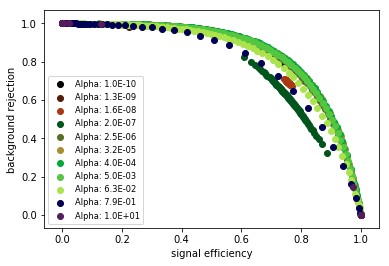

In [12]:
alphas = np.logspace(-10,1,11)
fig = plt.figure()
ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probs,accept,rej = runSciKitRegressionL2(18,alpha)
    ax.scatter(accept,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1

ax.set_xlabel('signal efficiency')
ax.set_ylabel('background rejection')
plt.legend(loc='lower left', fontsize = 'small');
plt.show()

With L2 regularization we get all the way up to 79% accuracy and have a stable local maximum of it in $\alpha$ space. This is completing the picture that L2 regularization is better suited to the task at hand, which makes sense considering all the input variables are in fact important.

<b> Exercises:</b>
* Try running sci-kit learn after scaling the data - does it help the performance?
* Try coming up with some 'rectangular' requirements (i.e. a set of optimized requirements on the input variables) and see how the ROC curve for those requirements compares to using Logistic Regression
* Is there a way we could select a region training data that could potentially improve performance? Hint: Think about where the gains of ML are most valuable
* Try adding a layer of neurons in the TensorFlow code to see if you can improve performance (see also discussion in Notebook 13: __Section IX: Pytorch DNN (SUSY)__).

A: This is done by using a defined data_rescale function in the code. It decreases the average accuracy for different $\alpha$, and changes the dependancy of performance on $\alpha$.

A: